In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
data=pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Performing Visualization

## Univariate analysis

In [3]:
df = pd.DataFrame(data)

In [4]:
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Stripplot 

<AxesSubplot:ylabel='Length'>

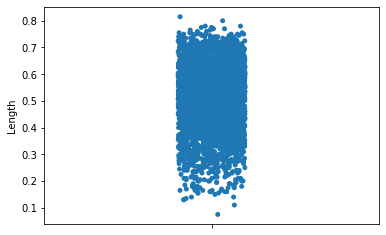

In [6]:
sns.stripplot (y=df['Length'])

## Boxplot

<AxesSubplot:xlabel='Shell_weight'>

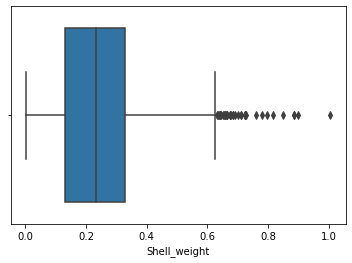

In [7]:
sns.boxplot(x =data['Shell_weight'])

## Violin Plot

<AxesSubplot:xlabel='Shucked_weight'>

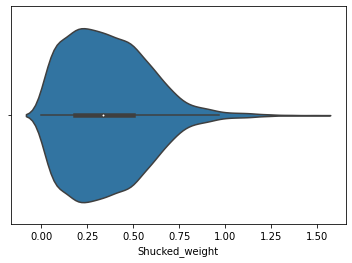

In [8]:
import warnings
warnings.filterwarnings('ignore')
sns.violinplot(df['Shucked_weight'],orient='vertical')

## Countplot

<AxesSubplot:xlabel='Sex', ylabel='count'>

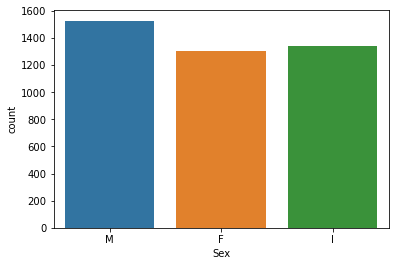

In [9]:
sns.countplot(df['Sex'])

# Bivariate analysis

## Barplot

<AxesSubplot:xlabel='Sex', ylabel='Length'>

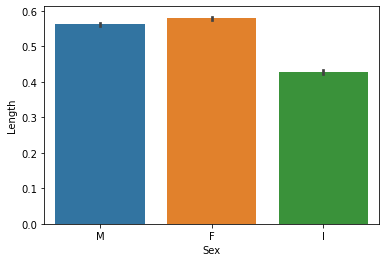

In [10]:
sns.barplot(x='Sex',y='Length',data=data)

# Scatterplot

Text(0, 0.5, 'Rings')

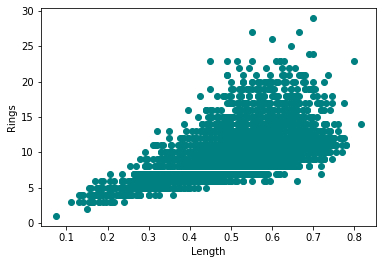

In [11]:
plt.scatter(data['Length'],data['Rings'],c='teal')
plt.xlabel('Length')
plt.ylabel('Rings')

## Relational plot

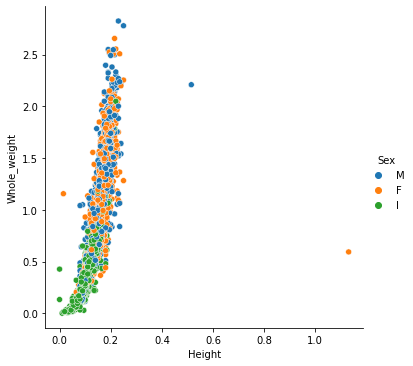

In [12]:
sns.relplot(x='Height',y='Whole_weight',hue='Sex',data=data)

## Lineplot

<AxesSubplot:xlabel='Rings', ylabel='Height'>

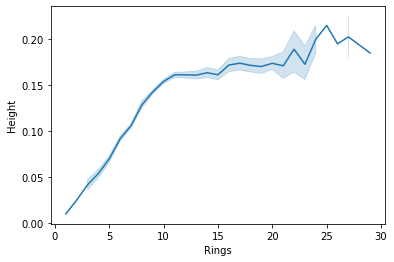

In [13]:
sns.lineplot(x=data.Rings,y=data.Height)

# Multivariate analysis

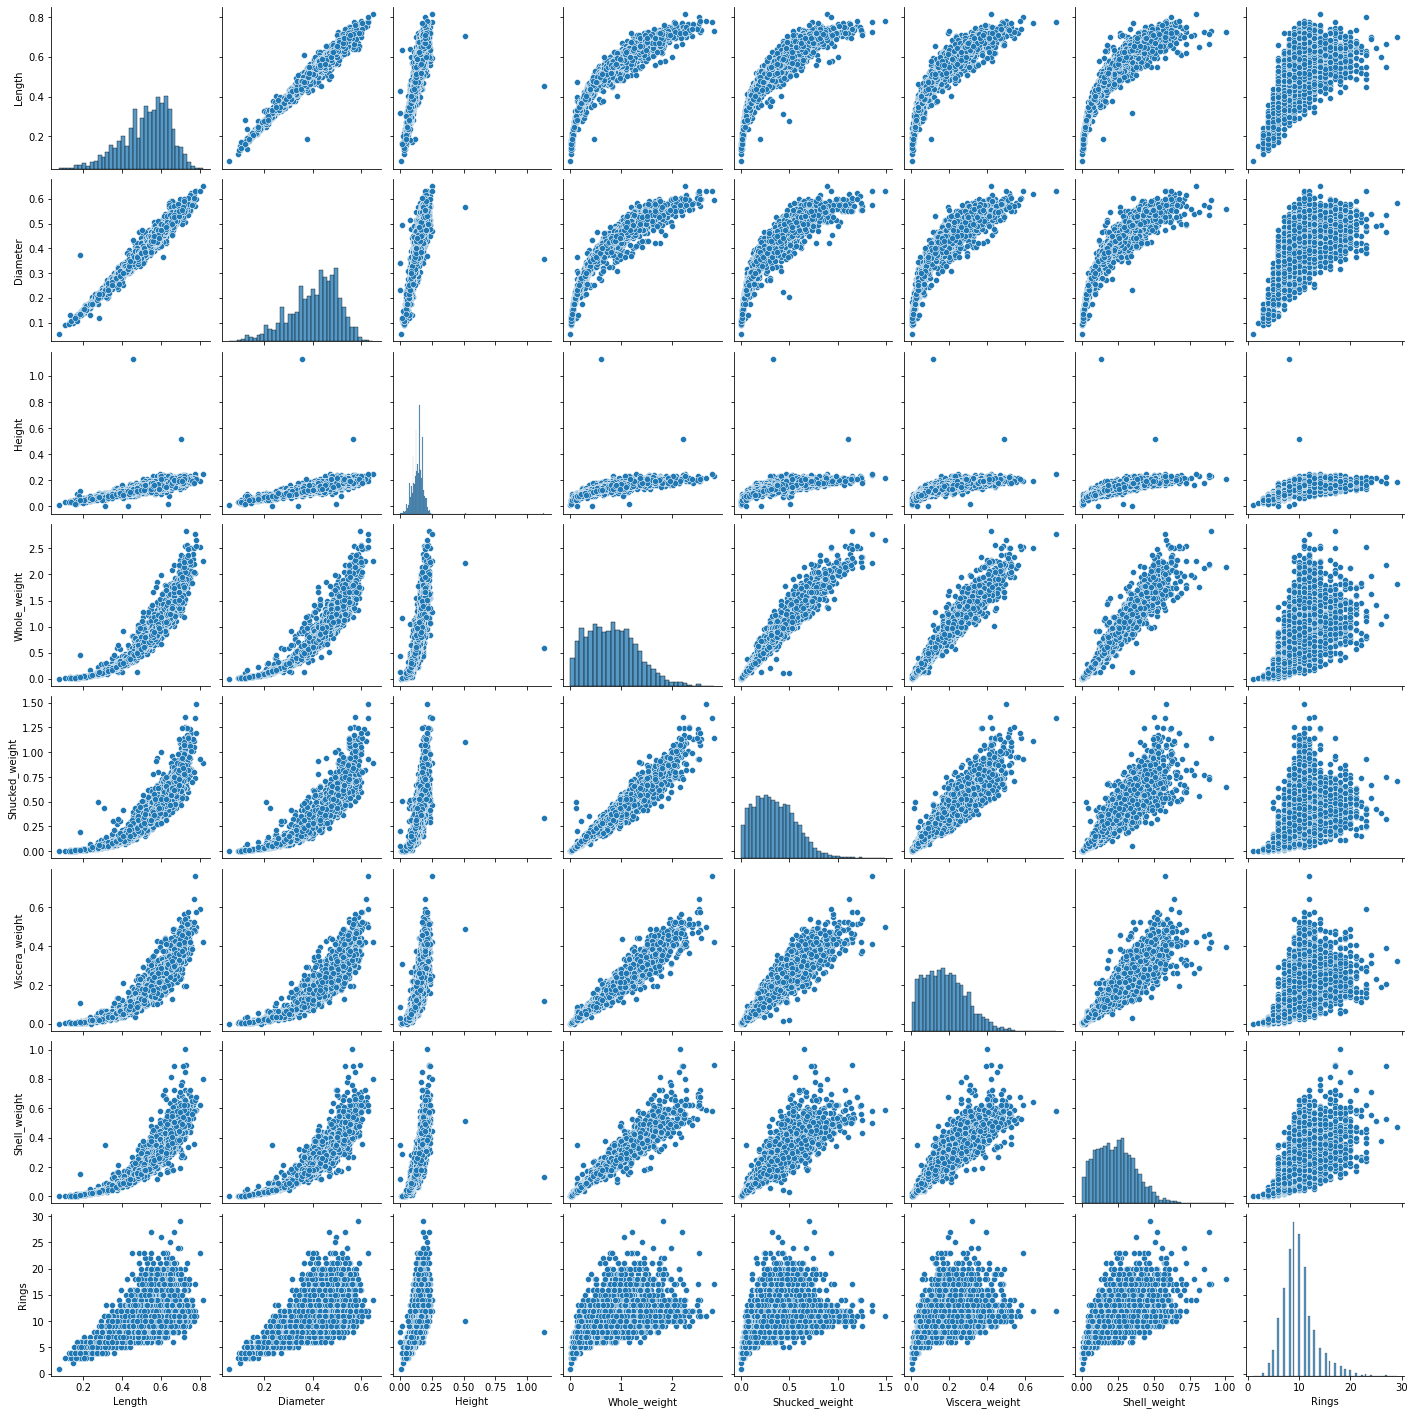

In [14]:
sns.pairplot(data)

# Perform descriptive statistics on the dataset

In [15]:
data.describe(include="all")

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


# Check for Missing values and deal with them

In [16]:
data.isnull().all()

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Rings             False
dtype: bool

In [17]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

# Find the outliers and replace them outliers

In [18]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0


<AxesSubplot:xlabel='Shell_weight'>

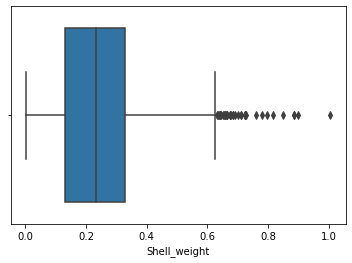

In [19]:
sns.boxplot(x =data['Shell_weight'])

In [20]:
Q1 = df['Shell_weight'].quantile(0.25)
Q3 = df['Shell_weight'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_limit = Q1 - 1.5 * IQR
data.median(numeric_only=True)

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole_weight      0.7995
Shucked_weight    0.3360
Viscera_weight    0.1710
Shell_weight      0.2340
Rings             9.0000
dtype: float64

<AxesSubplot:xlabel='Shell_weight'>

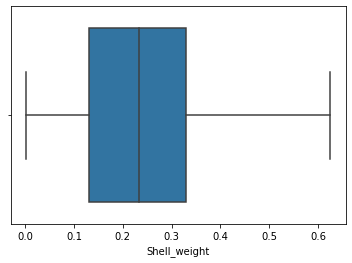

In [21]:
data['Shell_weight'] = np.where(data['Shell_weight'] < lower_limit, 7, data['Shell_weight'])
sns.boxplot(x =data['Shell_weight'],showfliers = False)

# Check for Categorical columns and perform encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Sex = lab.fit_transform(data.Sex)

data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Split the data into dependent and independent variables

Our initial task was to determine the age of the abalone molluscs based on the number of rings. We know that age is determined by the number of rings + 1.5. Therefore, we need to create a new ["Age"] column in our data and drop the ["Rings"] column.

In [23]:
data["Age"] = data["Rings"] + 1.5

data.drop("Rings", axis=1, inplace=True)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [24]:
independent = data.iloc[:,:-1].values
dependent = data.iloc[:,8:].values

In [25]:
independent.shape

(4177, 8)

In [26]:
dependent.shape

(4177, 1)

# Scale the independent variables

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']]
df[['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']]=scale.fit_transform(X)
df[['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


# Split the data into training and testing

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .2)

# Building and training the Model

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

# Testing the model

In [30]:
predictions = rf.predict(X_test)
expected = y_test

# Evaluating our model

In [31]:
errors = abs(predictions - expected)

print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3.13


### Calculate mean absolute percentage error (MAPE)

In [32]:
mape = 100 * (errors / y_test)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 70.87 %.
